# From unstructured text to visualization
## Political science course

In this notebook, we will explore different ways of visualizing unstructured text data. This first notebook will introduce different concepts required for working effectively with text.

## Tokenization
To get started, we will load some prepared sample data. Change the group variable to your assigned group, then execute the cell to load the data.

In [ ]:
import pandas as pd

# Change the value of this variable
group = 1

url = "https://raw.githubusercontent.com/daalft/polviz/main/data/{}.tsv"
group_map = {1: "like_dempa", 2: "dis_dempa", 3: "like_repa", 4: "dis_repa", 5: "like_dempc"}
group_url = url.format(group_map[group])
# Read the TSV file
df = pd.read_csv(group_url, sep='\t')
data = [str(x) for x in df[df.columns[1]].tolist()]

Next, we will split the data into words using simple white-space tokenization.

In [ ]:
words = " ".join(data).split(" ")

Next, we will create a counter over all words.

In [ ]:
from collections import Counter
counts = Counter(words)

This allows us to easily see the most frequent words. Execute the next cell to see the most frequent $n$ words.

In [ ]:
n = 10
counts.most_common(n)

[('the', 2331),
 ('to', 1635),
 ('', 1627),
 ('and', 1525),
 ('for', 1053),
 ('of', 965),
 ('they', 959),
 ('I', 761),
 ('are', 694),
 ('that', 573)]

## Stopword filtering
As you can see from the above output, we get many words we may not be interested in, such as _the_, _to_, and _and_. These words are commonly referred to as stopwords (i.e., words that have little value for most tasks; **N.B.**: There are cases where stopwords are informative, for example in author profiling). Let's filter out these words.

In [ ]:
import nltk
from nltk.corpus import stopwords
# Download the necessary resource, only required the first time
nltk.download('stopwords')
# Load the set of English stopwords
stop_words = set(stopwords.words('english'))
# Filter out words that are stopwords
words2 = [x for x in words if x and x.lower() not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Now, let's see how our counts look without stopwords.

In [ ]:
counts2 = Counter(words2)
n = 10
counts2.most_common(n)

[('people', 460),
 ('like', 400),
 ('party', 245),
 ('rights,', 242),
 ('rights', 234),
 ('support', 226),
 ('care', 209),
 ('middle', 204),
 ('social', 201),
 ('think', 194)]

## Some visualizations

Let's visualize these results. First, we will show the $n$ most frequent words using a horizontal bar chart, and then a word cloud.

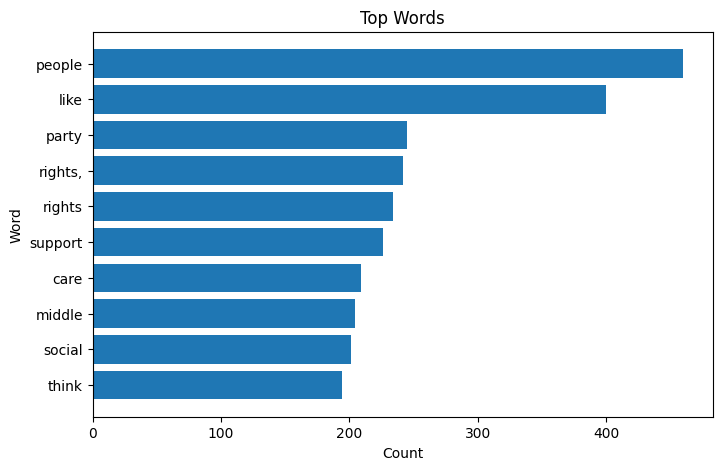

In [ ]:
import matplotlib.pyplot as plt

viz_counts = counts2.most_common(n)
words, counts = zip(*viz_counts)

plt.figure(figsize=(8,5))
plt.barh(words, counts)
plt.gca().invert_yaxis()  # highest count on top
plt.xlabel("Count")
plt.ylabel("Word")
plt.title("Top Words")
plt.show()

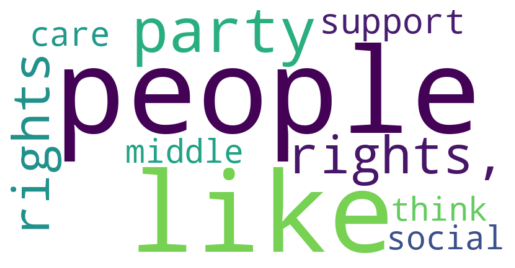

In [ ]:
from wordcloud import WordCloud

word_freq = dict(viz_counts)

wc = WordCloud(width=800, height=400, background_color='white')
wc.generate_from_frequencies(word_freq)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Prepared data
For the purpose of this course, the data was parsed using [stanza](https://stanfordnlp.github.io/stanza/index.html), with the following modules: Part-of-Speech tagging, Lemmatization, Named Entity Recognition, Sentiment Analysis. Due to the lengthy calculation, the data is provided in already annotated form.

In [ ]:
import os
import re
import requests
stanza_url = os.path.splitext(group_url)[0] + "_stanza.json"
response = requests.get(stanza_url)
stanza_data = response.json()

In [ ]:
sentences = []
for item in stanza_data:
    if isinstance(item, dict):
        sentences.append(item)
    elif isinstance(item, list):
        sentences.extend([x for x in item if isinstance(x, dict)])

In [ ]:
lemmas_list = [[t.get("lemma") for t in s.get("tokens", []) if t.get("lemma")] for s in sentences]
flat_lemmas = [lemma for sublist in lemmas_list for lemma in sublist if lemma and not lemma in stop_words and re.match(r"\w+", lemma)]

In [ ]:
lemma_counts = Counter(flat_lemmas)

In [ ]:
n = 10
lemma_counts.most_common(n)

[('I', 987),
 ('person', 743),
 ('right', 737),
 ('like', 424),
 ('policy', 391),
 ('support', 342),
 ('party', 336),
 ('good', 315),
 ('woman', 311),
 ('ae', 304)]

## Part-of-Speech filtering
Next, we will filter our data by part-of-speech.

In [ ]:
lemma_pos_list = [[(t.get("lemma"), t.get("xpos")) for t in s.get("tokens", []) if t.get("lemma")] for s in sentences]

In [ ]:
flat_lemma_pos = [x for sublist in lemma_pos_list for x in sublist if len(x) == 2 and x[0] not in stop_words and re.match(r"\w+", x[0])]

In [ ]:
target_pos = "JJ" # set to NN for only nouns, VB for verbs, JJ for adjectives
filtered_list = [x for x in flat_lemma_pos if x[1] == target_pos]

In [ ]:
Counter(filtered_list).most_common(15)

[(('middle', 'JJ'), 208),
 (('social', 'JJ'), 204),
 (('good', 'JJ'), 119),
 (('democratic', 'JJ'), 91),
 (('progressive', 'JJ'), 75),
 (('human', 'JJ'), 73),
 (('reproductive', 'JJ'), 62),
 (('liberal', 'JJ'), 62),
 (('many', 'JJ'), 58),
 (('right', 'JJ'), 58),
 (('inclusive', 'JJ'), 57),
 (('American', 'JJ'), 55),
 (('general', 'JJ'), 55),
 (('poor', 'JJ'), 54),
 (('fair', 'JJ'), 52)]

## Named Entities
Next, we look at the named entities in our data.

In [ ]:
sentences[0]["tokens"][0].get("ner")

In [ ]:
named_entities = [[(t.get("text"), t.get("ner")) for t in s.get("tokens", []) if t.get("ner")] for s in sentences]
named_entities = [x for x in named_entities if len(x) > 0]

In [ ]:
flat_named_entities = [x for sublist in named_entities for x in sublist]

In [ ]:
Counter(flat_named_entities).most_common(10)

[(('10', 'CARDINAL'), 255),
 (('the', 'ORG'), 203),
 (('Party', 'ORG'), 111),
 (('Democratic', 'ORG'), 110),
 (('Democrats', 'NORP'), 75),
 (('party', 'ORG'), 70),
 (('Americans', 'NORP'), 64),
 (('CHAR', 'ORG'), 57),
 (('American', 'NORP'), 53),
 (('The', 'ORG'), 50)]

Wait a minute! _the_ is not a named entity! Right, so we can't flatten the list and look at it as before...

In [ ]:
named_entities[2:5]

[[('the', 'ORG'), ('Democratic', 'ORG'), ('Party', 'ORG'), ('the', 'ORG')],
 [('the', 'GPE'),
  ('Democrats', 'NORP'),
  ('the', 'GPE'),
  ('the', 'GPE'),
  ('the', 'GPE'),
  ('the', 'GPE'),
  ('United', 'GPE'),
  ('States', 'GPE')],
 [('Democrats', 'NORP'), ('American', 'NORP')]]

## Polarity
Next, we will visualize sentiment (polarity) in our dataset.

In [ ]:
sentiments = [s.get("sentiment") for s in sentences]

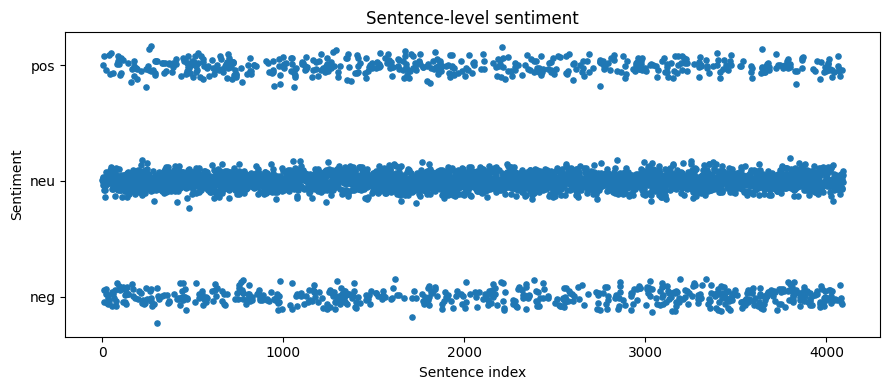

In [ ]:
import numpy as np
# df has columns: sentence_index, sentiment (0/1/2), text
y = sentiments
x = np.arange(len(y))

# add small vertical jitter so overlapping integers are visible
rng = np.random.default_rng(0)
y_jitter = y + rng.normal(0, 0.06, size=len(y))

plt.figure(figsize=(9,4))
plt.scatter(x, y_jitter, s=14)
plt.yticks([0,1,2], ["neg","neu","pos"])
plt.xlabel("Sentence index")
plt.ylabel("Sentiment")
plt.title("Sentence-level sentiment")
plt.tight_layout()
plt.show()